In [19]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
import matplotlib.style as style
plt.rcParams["figure.figsize"] =(16,9)
style.use('ggplot')

import IPython.display as ipd

## Parte 1
Considere o sinal senoidal
$$x(t) = \sin(\Omega_{0} t)$$

Se $x(t)$ é amostrado com frequência $\Omega_s = \frac{2\pi}{T} = 2\pi(8192)$rad/seg, então o sinal de tempo discreto (sequência) obtido é 
$$x[n] = \sin\left(\frac{\Omega_{0}n}{8192}\right)$$

a) Considere $\Omega_{0} = 2\pi(1000)\text{rad/seg}$, e crie o vetor $n = [0 : 8191]$, de modo que $t = nT$ contenha os $8192$ instantes de amostragem do intervalo $0 \leq t < 1$. Crie um vetor x que contenha as amostras de $x(t)$ nos instantes de amostragem em $t$. 

In [20]:
Fs = 8192

n = np.array(range(Fs))
x = np.sin(2 * np.pi * 1000 * n/Fs)

b) Esboce as primeiras $50$ amostras de $x[n]$ em função de $n$ usando stem. Esboce as primeiras $50$ amostras de $x(t)$ em função dos instantes de amostragem usando plot. Use subplot para exibir simultaneamente os dois gráficos.

Note que, dada as amostras em $x$, plot(t, x) esboça um sinal de tempo contínuo usando linhas retas para interpolar entre os valores das amostras. Embora esta interpolação não seja igual à reconstrução de banda limitada decorrente do teorema da amostragem, ela pode ser uma boa aproximação.

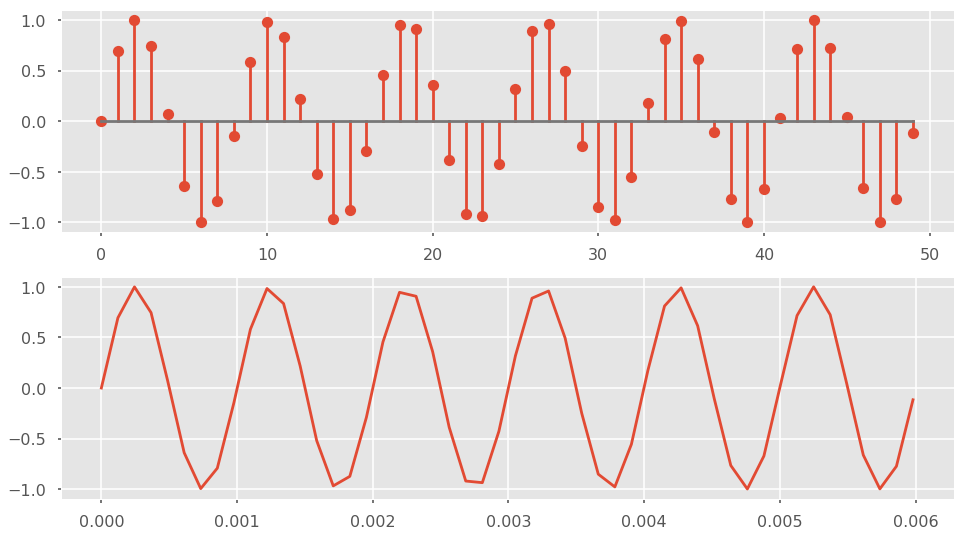

In [21]:
t = n / Fs

plt.subplot(211)
plt.stem(n[:50], x[:50])

plt.subplot(212)
plt.plot(t[:50], x[:50])

c) Coloque o arquivo MATLAB (M-file) ctfs.m no seu MATHLABPATH. Use $[X, \omega] = \text{ctfs}(x, T)$ para calcular a transformada de Fourier de tempo contínuo do sinal reconstruido $x_r(t)$. Esboce a magnitude de $X$ versus $\omega$. $X$ é diferente de zero nos valores de frequência esperados? (Note que quase todos os elementos em X são não nulos, mas a maioria deles são valores pequenos devido a erros de arredondamento).

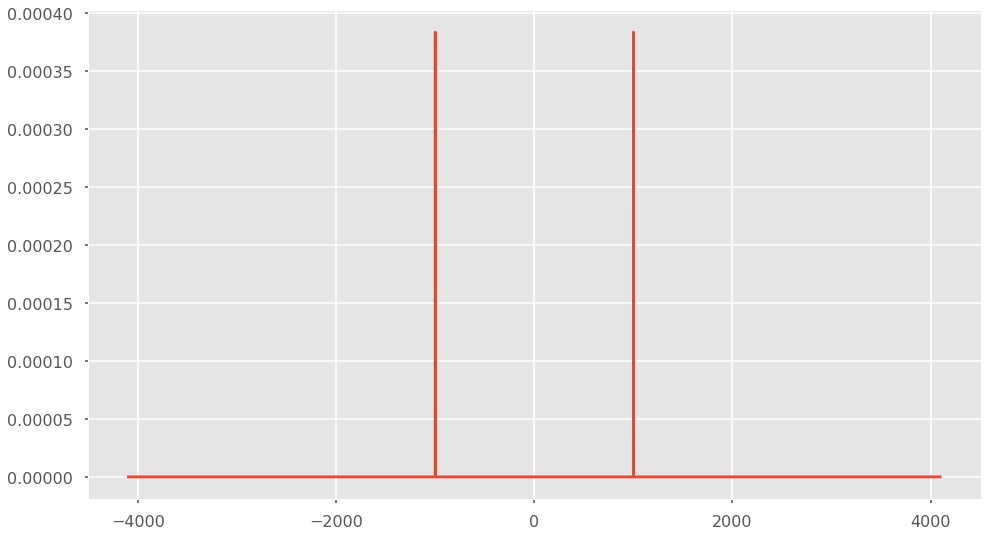

In [22]:
def ctfts(x: np.ndarray, T: float) -> (np.ndarray, np.ndarray):
    N = len(x)
    X = np.fft.ifftshift(np.fft.ifft(x, N)) * (2 * np.pi/N)
    w = np.linspace(-1, 1 - 1/N, N) / (2*T)
    return np.array(X, dtype=complex), w

X, w = ctfts(x, 1/Fs)
plt.plot(w, np.abs(X))

## Parte 2: Problemas Intermediários
d) Repita as partes (a)-(c) para as frequências $\Omega_{0} = 2\pi(1500)$ e $\Omega_{0} = 2\pi(2000) \text{rad/seg}$. A magnitude de X é diferente de zero nas frequências esperadas? A fase de X está correta?

<span style="color:green"> As colunas abaixo mostram os gráficos para as frequências x1 e x2 com as frequências $\Omega_1 = 2\pi (1500)$ e $\Omega_2 = 2\pi(2000)$.</span>

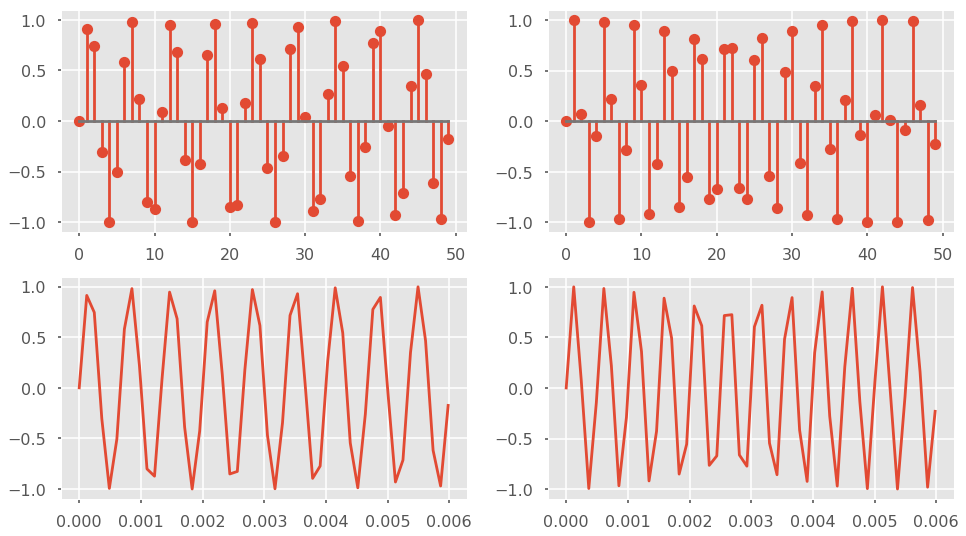

In [23]:
x1 = np.sin(2 * np.pi * 1500 * n/Fs)
x2 = np.sin(2 * np.pi * 2000 * n/Fs)

plt.subplot(221)
plt.stem(n[:50], x1[:50])

plt.subplot(223)
plt.plot(t[:50], x1[:50])

plt.subplot(222)
plt.stem(n[:50], x2[:50])

plt.subplot(224)
plt.plot(t[:50], x2[:50])

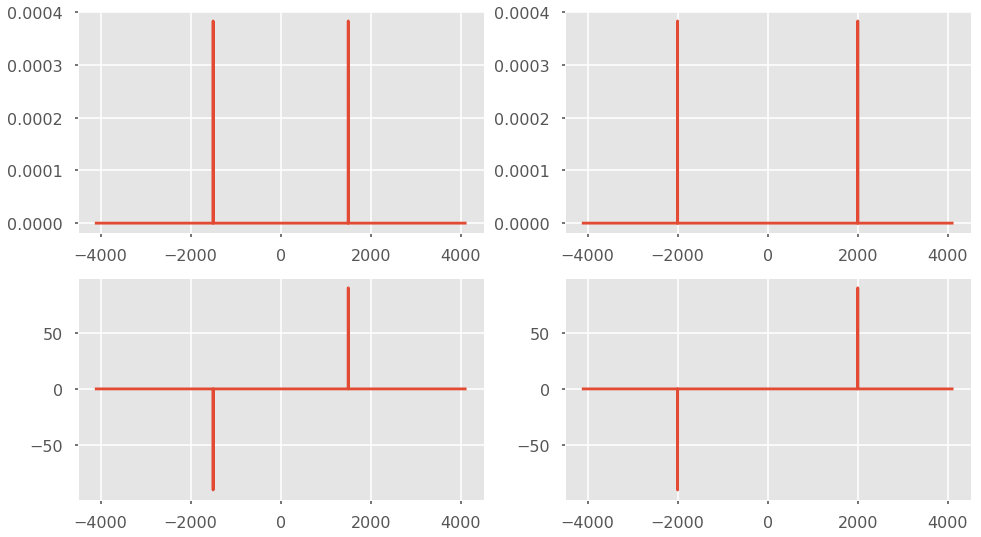

In [24]:
def filter_small_values(arr):
    arr[np.where(np.abs(arr) < 3e-4)] = 0
    return arr

X1, w1 = ctfts(x1, 1/Fs)
X2, w2 = ctfts(x2, 1/Fs)

plt.subplot(221)
plt.plot(w1, np.abs(X1))

plt.subplot(223)
plt.plot(w1, np.angle(filter_small_values(X1), deg=True))

plt.subplot(222)
plt.plot(w2, np.abs(X2))

plt.subplot(224)
plt.plot(w2, np.angle(filter_small_values(X2), deg=True))

c) Escute  cada  um  dos  sinais  amostrados  criados  na  parte  (d)  usando sound(x,  1/T).  A afinação  (pitch)  do  tom  que  você  ouve  aumenta  com  a  frequência $\Omega_0$?  Experimente livremente.  Note  que,  como  acontece  com  a  função plot,  a  função soundtambém implementa uma interpolação. Em resumo, seu micro converte o sinal de tempo discreto do MatLab em um sinal de tempo contínuo por meio de um conversor D/A e então reproduz osinal contínuo no auto-falante.

In [25]:
print('1,0kHz Tone')
ipd.display(ipd.Audio(x, rate=Fs))
print()

print('1,5kHz Tone')
ipd.display(ipd.Audio(x1, rate=Fs))
print()

print('2,0kHz Tone')
ipd.display(ipd.Audio(x2, rate=Fs))
print()

1,0kHz Tone



1,5kHz Tone



2,0kHz Tone


f) Agora   repita   as   partes   (a)-(c)   para   as   frequências $\Omega_0 = 2\pi(3500)$, $\Omega_0 = 2\pi(4000)$,
$\Omega_0 = 2\pi(4500)$, $\Omega_0 = 2\pi(5000)$ e $\Omega_0 = 2\pi(5500)$
rad/seg.   Escute   cada   um   dos   sinais amostrados  usando sound.  O  que  você  observa  em  relação  à  afinação  nesses  casos? Explique.

			 f = 3500Hz 			


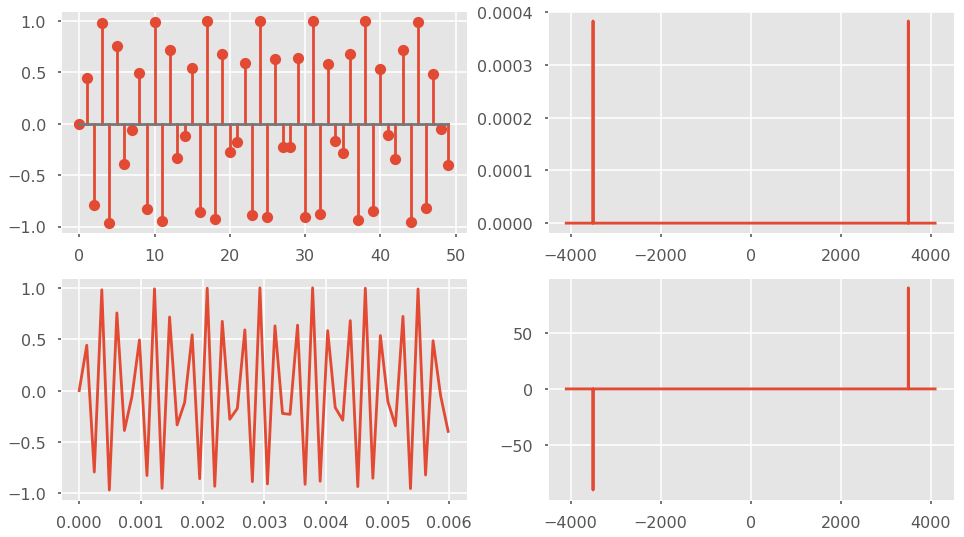

3500Hz Tone




		 ---------------------------------------------------------------------------------------------------- 		

			 f = 4000Hz 			


In [ ]:
def plot_graphs_for_freq(freq):
    x = np.sin(2 * np.pi * freq * n/Fs)
    
    plt.subplot(221)
    plt.stem(n[:50], x[:50])
    plt.subplot(223)
    plt.plot(t[:50], x[:50])
    
    X, w = ctfts(x, 1/Fs)
    plt.subplot(222)
    plt.plot(w, np.abs(X))
    plt.subplot(224)
    plt.plot(w, np.angle(filter_small_values(X), deg=True))
    plt.show()
    
    print(f'{freq}Hz Tone')
    ipd.display(ipd.Audio(x, rate=Fs))
    print()
    
for freq in range(3500, 6000, 500):
    print(f'\t\t\t f = {freq}Hz \t\t\t')
    plot_graphs_for_freq(freq)
    print()
    print(f'\t\t {"-"*100} \t\t')
    print()

## Parte 3: Problemas Avançados

Agora considere o sinal chirp:

$x(t) = sin(\Omega_0 t + \frac{1}{2} \beta t^2)$

cuja frequência instantânea $\Omega_i(t)$ aumenta com o tempo, 

$\Omega_i(t) = \frac{d}{dt}(\Omega_0t + \frac{1}{2} \beta t^2) = \Omega_0 + \beta t$

Para os itens (g)-(j) considere que $\Omega_s = 2\pi(8192)$ rad/seg.

g) Considere $\Omega_0 = 2\pi(3000)$ rad/seg e $\beta = 2000$ rad/seg². Armazene no vetor x as amostras do chirp no intervalo $0 <= t <= 1$.

In [14]:
Fs = 8192
omega_s = Fs * 2 * np.pi

omega_o = 3000 * 2 * np.pi 
b = 2000

n = np.array(range(Fs))
t = n / Fs

x = np.sin(omega_o * t + b * (t ** 2))

h) Use sound para ouvir o chirp contido em x. Vc pode explicar o que escutou?

In [15]:
print(f'Chirp')
ipd.display(ipd.Audio(x, rate=Fs))
print()

Chirp


i) Determine a amostra temporal em que o chirp tem frequência máxima. Dada a equação linear da frequência instantânea e o seu conhecimento sobre o efeito de aliasing, explique como você poderia ter previsto esse valor.

j) Armazene no vetor x as amostras dos primeiros 10 segundos do chirp. Escute o sinal usando sound. Explique  como você poderia ter previsto os instantes nos quais o sinal tem frequência nula ou muito baixa.

In [ ]:
n = np.array(range(10 * Fs))
t = n / Fs

x = np.sin(omega_o * t + b * (t ** 2))

print(f'10s Chirp')
ipd.display(ipd.Audio(x, rate=Fs))
print()